In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [12]:
df=pd.read_csv("temps.csv")

In [13]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [14]:
df.shape

(348, 12)

In [15]:
df.size

4176

In [16]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [17]:
#Convert categorical to numeric features

df=pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [18]:
df.shape

(348, 18)

In [19]:
df.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')

In [20]:
df["day"].value_counts()

16    12
9     12
23    12
15    12
28    12
12    12
10    12
11    12
8     12
7     12
6     12
5     12
4     12
3     12
21    11
27    11
26    11
25    11
24    11
22    11
1     11
20    11
19    11
18    11
17    11
2     11
14    11
13    11
29    10
30    10
31     6
Name: day, dtype: int64

In [21]:
df["month"].value_counts()

1     31
3     31
5     31
7     31
12    31
4     30
6     30
10    30
11    30
9     28
2     26
8     19
Name: month, dtype: int64

In [22]:
#dropping year
df.drop(["year"],axis=1,inplace=True)

In [23]:
df

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [24]:
df.shape

(348, 17)

In [25]:
# Seperate out features and target value from dataset
X=df.drop(["actual"],axis=1).values
y=df["actual"].values

In [26]:
#split the data in training and testing set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (261, 16)
X_test shape :  (87, 16)
y_train shape :  (261,)
y_test shape :  (87,)


In [28]:
#Model
rf=RandomForestRegressor(n_estimators=1000,random_state=42)

#fit model

rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [29]:
#prediction
y_pred=rf.predict(X_test)
y_pred

array([69.894, 61.311, 51.838, 61.331, 66.474, 70.284, 78.954, 75.945,
       62.044, 74.06 , 63.679, 72.146, 38.642, 62.558, 71.664, 55.993,
       60.951, 57.006, 56.676, 76.123, 63.684, 54.362, 66.548, 62.506,
       58.657, 53.029, 66.651, 46.469, 62.18 , 80.157, 73.759, 64.273,
       55.326, 82.128, 74.137, 61.627, 53.678, 51.405, 68.91 , 42.386,
       70.363, 57.358, 75.855, 42.474, 61.107, 73.991, 52.664, 81.469,
       53.237, 42.449, 46.478, 42.242, 64.18 , 65.781, 74.088, 61.41 ,
       55.166, 59.937, 54.497, 59.633, 65.539, 50.212, 60.757, 70.168,
       60.099, 59.281, 71.771, 69.866, 76.804, 41.387, 76.789, 56.868,
       60.416, 50.491, 54.489, 63.883, 43.877, 74.416, 47.341, 52.38 ,
       53.485, 68.207, 73.444, 72.496, 63.22 , 57.148, 45.948])

In [30]:
#calculate RMSE
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

5.091044648124332


In [31]:
#merge predicted and actual value in one dataframe
y_pred_df=pd.DataFrame(y_pred)
y_pred_df["Actual"]=y_test
y_pred_df.columns=["Predicted","Actual"]
y_pred_df

,Predicted,Actual
0,69.894,66
1,61.311,61
2,51.838,52
3,61.331,66
4,66.474,70
...,...,...
82,73.444,81
83,72.496,67
84,63.220,66
85,57.148,57


In [32]:
error=abs(y_pred-y_test)
error

array([ 3.894,  0.311,  0.162,  4.669,  3.526, 11.716,  6.046,  8.055,
        2.956, 17.94 ,  2.679, 12.854,  5.358,  2.442,  2.664,  6.007,
        3.049,  1.006,  3.676,  2.877,  0.684,  2.638,  0.452,  0.506,
        0.343,  2.971,  1.651,  5.531,  3.82 ,  4.157,  9.759,  3.273,
        7.326,  1.128,  2.863,  4.627,  4.322,  4.405,  0.91 ,  8.614,
        6.637,  1.358,  2.855,  8.526,  2.107, 13.009,  5.336,  0.469,
        4.763,  0.449,  2.522,  2.242,  0.82 ,  1.781,  4.088,  3.59 ,
        2.166,  2.937,  1.497,  0.367,  1.461,  1.212,  7.757,  1.168,
        5.099,  8.719,  4.229,  0.866,  1.196,  5.387,  2.789,  0.132,
        8.584,  0.491,  1.511,  3.117,  4.123,  5.584,  0.659,  3.38 ,
        3.515,  8.793,  7.556,  5.496,  2.78 ,  0.148,  0.948])

In [33]:
#mean absolute error

In [34]:
mse=np.mean(error)
print("MSE:",mse)

MSE: 3.8630574712643666


In [35]:
#MAPE:mean absolutepercentage error

mape=100*(error/y_test)
mape

array([ 5.9       ,  0.50983607,  0.31153846,  7.07424242,  5.03714286,
       14.28780488,  7.11294118,  9.58928571,  4.54769231, 19.5       ,
        4.39180328, 15.12235294, 12.17727273,  3.75692308,  3.86086957,
        9.68870968,  4.7640625 ,  1.79642857,  6.93584906,  3.64177215,
        1.08571429,  4.62807018,  0.67462687,  0.81612903,  0.58135593,
        5.30535714,  2.54      , 10.63653846,  5.78787879,  5.46973684,
       15.2484375 ,  5.36557377, 15.2625    ,  1.39259259,  3.71818182,
        8.11754386,  7.45172414,  9.37234043,  1.33823529, 16.89019608,
        8.61948052,  2.425     ,  3.9109589 , 16.71764706,  3.57118644,
       14.95287356,  9.2       ,  0.57901235,  8.21206897,  1.06904762,
        5.14693878,  5.605     ,  1.26153846,  2.7828125 ,  5.84      ,
        5.52307692,  4.08679245,  5.15263158,  2.8245283 ,  0.61166667,
        2.18059701,  2.47346939, 14.63584906,  1.69275362,  9.27090909,
       12.82205882,  5.56447368,  1.25507246,  1.53333333, 14.96

In [36]:
#accuracy

acc=100-np.mean(mape)
print("Accuracy: ",acc)

Accuracy:  93.94846113730775


# feature importance

In [37]:
importance=list(rf.feature_importances_)
print(importance)

[0.010322601403532283, 0.021113665271968222, 0.021110269148599918, 0.6555698213907486, 0.14948039120753628, 0.04601374758544169, 0.03517063342900543, 0.023184394345290835, 0.02054749470049068, 0.0034748931143383653, 0.00252835863556795, 0.0035930126241686816, 0.0022740438819965005, 0.0012834507255272797, 0.00232653540191857, 0.002006687133868861]


In [38]:
df.columns

Index(['month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')

In [39]:
features=['month', 'day', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed']

In [40]:
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(features, importance)]


In [41]:
feature_importance

[('month', 0.01),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('temp_1', 0.66),
 ('average', 0.15),
 ('forecast_noaa', 0.05),
 ('forecast_acc', 0.04),
 ('forecast_under', 0.02),
 ('friend', 0.02),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [42]:
feature_importance[0][1]

0.01

In [43]:
#sorting

feature_importance_sorted=sorted(feature_importance,key=lambda x: x[1],reverse=True)
feature_importance_sorted

[('temp_1', 0.66),
 ('average', 0.15),
 ('forecast_noaa', 0.05),
 ('forecast_acc', 0.04),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('forecast_under', 0.02),
 ('friend', 0.02),
 ('month', 0.01),
 ('week_Fri', 0.0),
 ('week_Mon', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

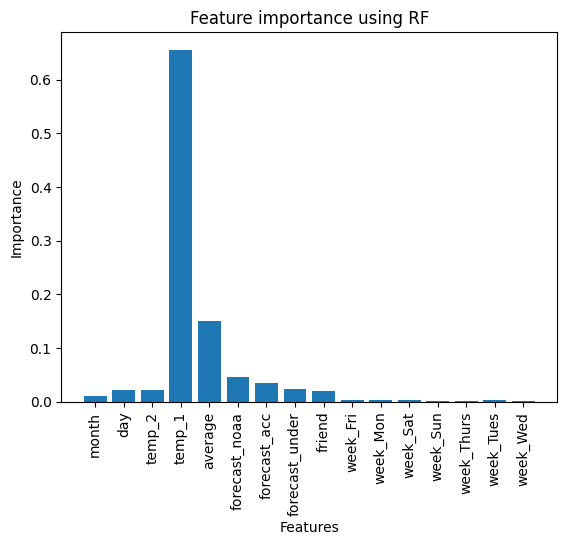

In [44]:
x_value=features
y=importance

plt.bar(x_value,y)
plt.xticks(x_value,rotation="vertical")
plt.title("Feature importance using RF")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
         

In [45]:
# we can eleminate the features with least importance and can 
# rebuild model again considering importance features

# Hyperparameter Tuning

In [46]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
#using randomized search method

In [45]:
#number of trees
n_estimators=[int(x) for x in np.linspace(start=200,stop=1000,num=10)]


#number of features
max_features=["auto","sqrt"]

#maximum number of levels in tree
max_depth=[int(y) for y in np.linspace(5,55,num=5)]

#min number of samples required to split mode
min_samples_split=[2,5,7,18]

#min number of samples required at each leaf mode
min_samples_leaf=[1,2,4]


In [46]:
[int(y) for y in np.linspace(5,55,num = 5)]

[5, 17, 30, 42, 55]

In [47]:
#create random grid

random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}

In [48]:
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, 42, 55], 'min_samples_split': [2, 5, 7, 18], 'min_samples_leaf': [1, 2, 4]}


In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,scoring="neg_mean_absolute_error",cv=3,verbose=2,random_state=42,return_train_score=True)

In [51]:
#fit model

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=911; total time=   1.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=911; total time=   1.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=911; total time=   1.0s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=644; total time=   0.7s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=644; total time=   0.7s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=644; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=288; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=288

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=733; total time=   0.7s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=555; total time=   0.6s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=555; total time=   0.5s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=555; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=1000; total time=   1.1s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=822; total time=   0.8s
[CV] END max_depth=17, max_features=au

[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=377; total time=   0.4s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=555; total time=   0.5s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=555; total time=   0.5s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=555; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=466; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=466; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=466; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=   0.4s
[CV] END max_depth=5, max_features=auto, 

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=644; total time=   0.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=644; total time=   0.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=644; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=644; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=288; total time=   0.2s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=733; total time=   0.8s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=733; total time=   0.8s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=733; total time=   0.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=288; total time=   0.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=288; total time=   0.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=288; total time=   0.2s
[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=822; total time=   0.9s
[CV] END max_depth=55, max_features=auto

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [5, 17, 30, 42, 55],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 18],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [53]:
#create function to evaluate model

def evaluate(model,test_features,test_labels):
    pred=model.predict(test_features)
    error=abs(pred-test_labels)
    mape=100*np.mean(error/test_labels)
    acc=100-mape
    print("Accuracy=",acc)
    return acc

In [54]:
#evaluating random search model
best_random=rf_random.best_estimator_
random_acc=evaluate(best_random,X_test,y_test)

Accuracy= 93.9595789343464


In [55]:
y_pred_random=best_random.predict(X_test)

In [56]:
rmse_random=np.sqrt(metrics.mean_absolute_error(y_test,y_pred_random))
print(rmse_random)

1.9617150760871445


In [57]:
#using Grid Search cv method

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters={"max_depth":[1,3,5,7,9],
           "min_samples_leaf":[1,2,4,5,6],
           "min_samples_split":[6,8,10,12],
            "max_features":["auto","sqrt"],
           "n_estimators":[100,300,500,700]
           }

In [60]:
grid_search=GridSearchCV(estimator=rf,param_grid=parameters,cv=3,verbose=2,return_train_score=True)

In [61]:
#fit frid search
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; tot

[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=auto, mi

[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=auto, m

[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt,

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_sam

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt,

[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_sam

[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto,

[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_sa

[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, 

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_s

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_sam

[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto,

[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_sam

[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=auto,

[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=7, max_features=sqrt, min_sam

[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, 

[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.6s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.8s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, min

[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_sa

[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto,

[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_sam

[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto,

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt,

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=700; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=9, max_features=sqrt, min_sa

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'min_samples_split': [6, 8, 10, 12],
                         'n_estimators': [100, 300, 500, 700]},
             return_train_score=True, verbose=2)

In [62]:
# best params

grid_search.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 300}

In [63]:
#evaluating random search model
best_grid=grid_search.best_estimator_
grid_acc=evaluate(best_grid,X_test,y_test)
print(grid_acc)

Accuracy= 94.16006127042304
94.16006127042304


In [64]:
y_pred_grid=best_grid.predict(X_test)

In [65]:
rmse_grid=np.sqrt(metrics.mean_squared_error(y_test,y_pred_grid))
print(rmse_grid)

5.042465724412032
